# Lab 05 : Final code -- demo

In [31]:
import sys, os

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import time
import utils

### Download the data

In [33]:
from utils import check_mnist_dataset_exists
data_path = check_mnist_dataset_exists()

train_data = torch.load(data_path+'mnist/train_data.pt')
train_label = torch.load(data_path+'mnist/train_label.pt')
test_data = torch.load(data_path+'mnist/test_data.pt')
test_label = torch.load(data_path+'mnist/test_label.pt')

### Make a one layer net class

In [34]:
class one_layer_net(nn.Module):
    
    def __init__(self, input_size, output_size):
        super(one_layer_net, self).__init__()
        self.linear_layer = nn.Linear(input_size, output_size, bias = False)
        
    def forward(self, x):
        scores = self.linear_layer(x)
        return scores

### Build the net

In [35]:
net = one_layer_net(784, 10)
print(net)
utils.display_num_param(net)

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=False)
)
There are 7840 (0.01 million) parameters in this neural network


### Choose the criterion, batchsize

In [36]:
criterion = nn.CrossEntropyLoss()

bs = 200

### Evaluate on test set

In [37]:
def eval_on_test_set():
    
    running_error = 0
    num_batches = 0
    
    for i in range(0, 10000, bs):
        
        minibatch_data = test_data[i:i+bs]
        minibatch_label = test_label[i:i+bs]
        
        inputs = minibatch_data.view(bs, 784)
        
        scores = net(inputs)
        
        error = utils.get_error(scores, minibatch_label)
        
        running_error += error.item()
        
        num_batches += 1
        
    total_error = running_error / num_batches
    
    print('test error = ', total_error * 100, 'percent')

### Training loop

In [38]:
start = time.time()

total_loss = 0
total_error = 0

lr = 0.05 # initial learning rate

for epoch in range(200):
    
    # learning rate strategy : divide the learning rate by 1.5 every 10 epochs
    if epoch % 10 == 0 and epoch > 10:
        lr = lr / 1.5
        
    # create a new optimizer at the beginning of each epoch: give the current learning rate.
    optimizer = torch.optim.SGD(net.parameters(), lr = lr)
    
    running_loss = 0
    running_error = 0
    num_batches = 0
    
    shuffled_indices = torch.randperm(60000)
    
    for count in range(0, 60000, bs):
        
        # forward and backward pass
        
        optimizer.zero_grad()
        
        indices = shuffled_indices[count:count+bs]
        minibatch_data = train_data[indices]
        minibatch_label = train_label[indices]
        
        inputs = minibatch_data.view(bs, 784)
        
        inputs.requires_grad_()
        
        scores = net(inputs)
        
        loss = criterion(scores, minibatch_label)
        
        loss.backward()
        
        optimizer.step()
        
        # compute some stats
        
        running_loss += loss.detach().item()
        
        error = utils.get_error(scores.detach(), minibatch_label)
        running_error += error.item()
        
        num_batches += 1
        
    # once the epoch is finished we divide the "running quantities"
    # by the number of batches
        
    total_loss = running_loss / num_batches
    total_error = running_error / num_batches
    elapsed_time = time.time() - start
    
    # every 10 epoch we display the stats
    # and compute the error rate on the test set
    
    if epoch % 10 == 0 :
        
        print(' ')
        
        print('epoch=', epoch, ' time=', elapsed_time,
             ' loss=', total_loss, ' error=', total_error * 100, 'percent lr=', lr)
        
        eval_on_test_set()

 
epoch= 0  time= 0.3943138122558594  loss= 0.8311448476711909  error= 17.536666591962177 percent lr= 0.05
test error =  12.090000033378601 percent
 
epoch= 10  time= 3.868051290512085  loss= 0.33110802978277204  error= 9.223333438237507 percent lr= 0.05
test error =  8.649999856948853 percent
 
epoch= 20  time= 8.609192371368408  loss= 0.3062324909865856  error= 8.548333128293354 percent lr= 0.03333333333333333
test error =  8.249999642372131 percent
 
epoch= 30  time= 13.386154651641846  loss= 0.297750457127889  error= 8.288332978884378 percent lr= 0.022222222222222223
test error =  8.129999876022339 percent
 
epoch= 40  time= 17.76618766784668  loss= 0.2934968334933122  error= 8.174999813238779 percent lr= 0.014814814814814815
test error =  8.049999952316284 percent
 
epoch= 50  time= 24.871856212615967  loss= 0.2910620597501596  error= 8.093333025773367 percent lr= 0.009876543209876543
test error =  8.009999871253967 percent
 
epoch= 60  time= 33.74099254608154  loss= 0.28960577328

### Chooose image at random from the test set and see how good/bad are the predictions

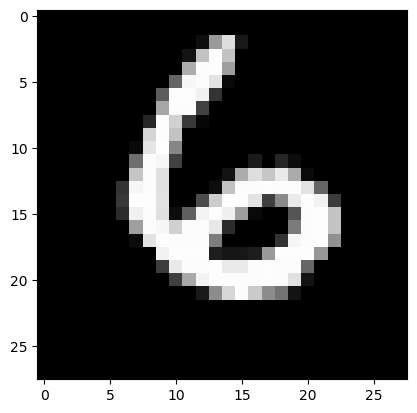

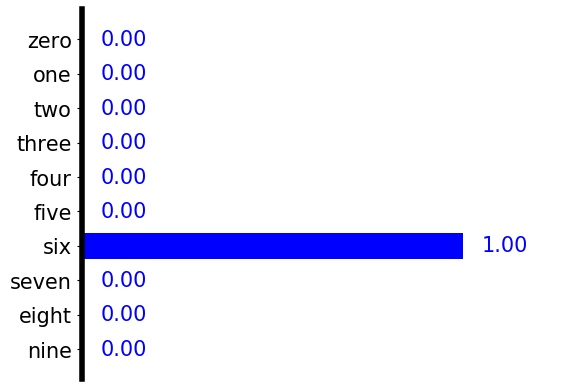

In [39]:
idx = randint(0, 10000-1)
im = test_data[idx]

# display image
utils.show(im)

# feed it to the net and display the confidence scores
scores = net(im.view(1, 784))
prob = F.softmax(scores, dim=1)
utils.show_prob_mnist(prob)